In [5]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_simple(grid, start, goal):
    open_list = [start]
    came_from = {}
    g = {start: 0}

    rows, cols = len(grid), len(grid[0])

    directions = [(0,1),(1,0),(0,-1),(-1,0)]

    while open_list:

        current = min(open_list, key=lambda x: g[x] + heuristic(x, goal))


        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return [start] + path[::-1]

        open_list.remove(current)


        for dx, dy in directions:
            nx, ny = current[0] + dx, current[1] + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if grid[nx][ny] == 1:
                    continue

                neighbor = (nx, ny)
                new_cost = g[current] + 1


                if neighbor not in g or new_cost < g[neighbor]:
                    g[neighbor] = new_cost
                    came_from[neighbor] = current

                    if neighbor not in open_list:
                        open_list.append(neighbor)

    return None

In [6]:
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

print("Grid defined:")
for row in grid:
    print(row)
print(f"Start point: {start}")
print(f"Goal point: {goal}")

Grid defined:
[0, 0, 0, 0, 0]
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 0, 0, 0, 0]
Start point: (0, 0)
Goal point: (4, 4)


In [7]:
path = a_star_simple(grid, start, goal)
print(f"Shortest path found: {path}")

Shortest path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


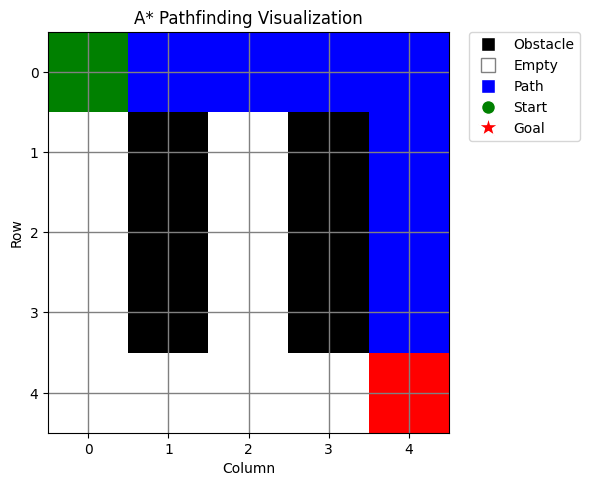

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert grid to a numpy array for easier plotting
grid_np = np.array(grid)

# Define colors
COLOR_OBSTACLE = 0  # Black for obstacles
COLOR_EMPTY = 1     # White for empty cells
COLOR_PATH = 2      # Blue for path
COLOR_START = 3     # Green for start
COLOR_GOAL = 4      # Red for goal

# Create a visualization grid, initialized with empty cells
vis_grid = np.full(grid_np.shape, COLOR_EMPTY, dtype=int)

# Mark obstacles
vis_grid[grid_np == 1] = COLOR_OBSTACLE

# Mark path
if path: # Ensure path exists before marking
    for r, c in path:
        if (r, c) != start and (r, c) != goal:
            vis_grid[r, c] = COLOR_PATH

# Mark start and goal
vis_grid[start[0], start[1]] = COLOR_START
vis_grid[goal[0], goal[1]] = COLOR_GOAL

# Create custom colormap
cmap = plt.cm.colors.ListedColormap(['black', 'white', 'blue', 'green', 'red'])
bounds = [0, 1, 2, 3, 4, 5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the grid
c = ax.imshow(vis_grid, cmap=cmap, norm=norm, origin='upper', extent=[-0.5, grid_np.shape[1]-0.5, grid_np.shape[0]-0.5, -0.5])

# Create legend handles and labels
handles = [
    plt.Line2D([0], [0], marker='s', color='w', label='Obstacle', markersize=10, markerfacecolor='black'),
    plt.Line2D([0], [0], marker='s', color='w', label='Empty', markersize=10, markerfacecolor='white', markeredgecolor='gray'),
    plt.Line2D([0], [0], marker='s', color='w', label='Path', markersize=10, markerfacecolor='blue'),
    plt.Line2D([0], [0], marker='o', color='w', label='Start', markersize=10, markerfacecolor='green'),
    plt.Line2D([0], [0], marker='*', color='w', label='Goal', markersize=15, markerfacecolor='red')
]

# Add legend
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_title('A* Pathfinding Visualization')
ax.set_xticks(np.arange(grid_np.shape[1]))
ax.set_yticks(np.arange(grid_np.shape[0]))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_aspect('equal')
ax.grid(color='gray', linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()
